In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv


In [3]:
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
train_data=pd.read_csv('/kaggle/input/titanic/train.csv')
gender_submission_data=pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [4]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Handling Missing Values****

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Embarked contains two missing values

In [8]:
train_data[train_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Amelie and Martha Boarded in Southampton according to encyclopedia-titanica.org "Mrs Stone boarded the Titanic in Southampton on 10 April 1912 and was travelling in first class with her maid Amelie Icard. She occupied cabin B-28"

In [9]:
train_data['Embarked']=train_data['Embarked'].fillna('S')

fillna fills the NaN values with a given number with which you want to substitute. It gives you an option to fill according to the index of rows of a pd.DataFrame or on the name of the columns in the form of a python dict 

Handling the Age Missing Values

In [10]:
train_data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [11]:
for name in train_data['Name']:
    train_data['Title']=train_data['Name'].str.extract('([A-Za-z]+)\.',expand=True)

In [12]:
df=train_data.groupby('Title').mean()

df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Title,,,,,,,
Capt,746.000000,0.000000,1.000000,70.0,1.000000,1.0,71.000000
Col,671.500000,0.500000,1.000000,58.0,0.000000,0.0,31.025000
Countess,760.000000,1.000000,1.000000,33.0,0.000000,0.0,86.500000
Don,31.000000,0.000000,1.000000,40.0,0.000000,0.0,27.720800
Dr,545.857143,0.428571,1.285714,42.0,0.571429,0.0,49.168457


In [13]:
train_data[train_data['Age'].isnull()].groupby('Title', as_index=False).count()

,Title,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,Dr,1,1,1,1,1,0,1,1,1,1,0,1
1,Master,4,4,4,4,4,0,4,4,4,4,0,4
2,Miss,36,36,36,36,36,0,36,36,36,36,2,36
3,Mr,119,119,119,119,119,0,119,119,119,119,12,119
4,Mrs,17,17,17,17,17,0,17,17,17,17,5,17


In [14]:
titles = ['Dr','Master','Miss','Mr','Mrs']

for title in titles:
    train_data.loc[train_data.Age.isnull() & (train_data.Title == title),'Age']=df['Age'][title]
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [15]:
Deal With Missing Cabin Data
I dont think the cabin will impact the model as such, since we can use fare and Pclass . To delete or not to delete ?

Dealing with Mising data in the test file

SyntaxError: invalid syntax (<ipython-input-15-b6b2dcb584db>, line 1)

In [16]:
for name in test_data['Name']:
    test_data['Title']=test_data['Name'].str.extract('([A-Za-z]+)\.', expand=True)

In [17]:
test_df=test_data.groupby('Title').mean()

title = ['Ms','Master','Miss','Mr','Mrs']

for title in test_data['Title']:
    test_data.loc[(test_data.Age.isnull()) & (test_data['Title'] == title),'Age']=test_df['Age'][title]
    
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              1
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [18]:
test_data.loc[test_data['Title']=='Ms']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
88,980,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.75,NaN,Q,Ms


O'Donoghue, Ms. Bridget's Age wasnt populated because we do not have a mean Value for the Ms tittle

On googling i found out that she was 21 years old

In [19]:
test_data['Age']=test_data['Age'].fillna(21)

test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

Deal with missing fare values

In [20]:
test_data[test_data.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr


In [21]:
test_data.groupby('Pclass')['Fare'].mean()

Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64

In [22]:
test_data['Fare']=test_data['Fare'].fillna(12.5)

In [23]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64

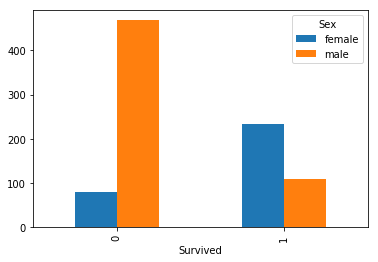

In [24]:
train_data.groupby(['Sex', 'Survived'] )['Survived'].count().unstack('Sex').plot(kind='bar')  

In [25]:
Handling Categorical Data

SyntaxError: invalid syntax (<ipython-input-25-051d1825810a>, line 1)

In [26]:
Convert the categorical Gender values to integers

SyntaxError: invalid syntax (<ipython-input-26-6a816552d211>, line 1)

In [27]:
train_data['Sex'] = train_data.Sex.apply(lambda x: 0 if x == "female" else 1)
test_data['Sex'] = test_data.Sex.apply(lambda x: 0 if x == "female" else 1)

In [28]:
train_data.drop('Cabin', axis=1)

test_data.drop ('Cabin', axis=1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",1,34.500000,0,0,330911,7.8292,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.000000,1,0,363272,7.0000,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",1,62.000000,0,0,240276,9.6875,Q,Mr
3,895,3,"Wirz, Mr. Albert",1,27.000000,0,0,315154,8.6625,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.000000,1,1,3101298,12.2875,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,32.000000,0,0,A.5. 3236,8.0500,S,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.000000,0,0,PC 17758,108.9000,C,Dona
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S,Mr
416,1308,3,"Ware, Mr. Frederick",1,32.000000,0,0,359309,8.0500,S,Mr


Add a new feature Is_child

In [29]:
for age in test_data['Age']:
    
    test_data.loc[(test_data['Age'] < 18),'Is_child']=1
    test_data.loc[(test_data['Age'] >= 18),'Is_child']=0

test_data.loc[test_data['Is_child']==1].sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Is_child
269,1161,3,"Pokrnic, Mr. Mate",1,17.0,0,0,315095,8.6625,NaN,S,Mr,1.0
403,1295,1,"Carrau, Mr. Jose Pedro",1,17.0,0,0,113059,47.1000,NaN,S,Mr,1.0
326,1218,2,"Becker, Miss. Ruth Elizabeth",0,12.0,2,1,230136,39.0000,F4,S,Miss,1.0
203,1095,2,"Quick, Miss. Winifred Vera",0,8.0,1,1,26360,26.0000,NaN,S,Miss,1.0
263,1155,3,"Klasen, Miss. Gertrud Emilia",0,1.0,1,1,350405,12.1833,NaN,S,Miss,1.0


In [30]:
for age in train_data['Age']:
    
    train_data.loc[(train_data['Age']<18),'Is_child']=1
    train_data.loc[(train_data['Age']>= 18),'Is_child']=0

train_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Is_child
458,459,1,2,"Toomey, Miss. Ellen",0,50.0,0,0,F.C.C. 13531,10.5000,NaN,S,Miss,0.0
713,714,0,3,"Larsson, Mr. August Viktor",1,29.0,0,0,7545,9.4833,NaN,S,Mr,0.0
338,339,1,3,"Dahl, Mr. Karl Edwart",1,45.0,0,0,7598,8.0500,NaN,S,Mr,0.0
520,521,1,1,"Perreault, Miss. Anne",0,30.0,0,0,12749,93.5000,B73,S,Miss,0.0
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",0,6.0,4,2,347082,31.2750,NaN,S,Miss,1.0


Convert tittles to integers

In [31]:
Keys = {'Capt': 1, 'Col': 1, 'Countess': 2, 'Don':1, 'Dr':1,'Dona':2, 'Jonkheer':1, 'Lady':2, 'Major':1, 'Mlle':3, 'Mme':2, 'Ms': 3, 'Rev': 1, 'Sir':1,'Mr':1,'Mrs':2,'Miss':3,'Master':4}

# Remap the values of the dataframe 
train_data= train_data.replace({'Title':Keys})
test_data=test_data.replace({'Title':Keys})

Convert Embarking points to integers

In [32]:
Emb_Keys={'C':1,'Q':2,'S':3}

train_data=train_data.replace({'Embarked':Emb_Keys})

test_data=test_data.replace({'Embarked':Emb_Keys})

Feature Generation[](http://)
Add is_alone feature

In [33]:
train_data['Is_Alone']=train_data['SibSp']+train_data['Parch']

train_data['Is_Alone']=train_data.Is_Alone.apply(lambda x:1 if x == 0 else 0)

test_data['Is_Alone']=test_data['SibSp']+test_data['Parch']
test_data['Is_Alone']=test_data.Is_Alone.apply(lambda x:1 if x == 0 else 0)


Add Individual Fare feature

In [34]:
train_data['Ind_Fare']=train_data['Fare']/(train_data['SibSp']+train_data['Parch']+1)
test_data['Ind_Fare']=test_data['Fare']/(test_data['SibSp']+test_data['Parch']+1)

In [35]:
train_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Is_child,Is_Alone,Ind_Fare
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",0,24.00000,0,2,PP 9549,16.7000,G6,3,2,0.0,0,5.566667
865,866,1,2,"Bystrom, Mrs. (Karolina)",0,42.00000,0,0,236852,13.0000,NaN,3,2,0.0,1,13.000000
114,115,0,3,"Attalah, Miss. Malake",0,17.00000,0,0,2627,14.4583,NaN,1,3,1.0,1,14.458300
799,800,0,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",0,30.00000,1,1,345773,24.1500,NaN,3,2,0.0,0,8.050000
711,712,0,1,"Klaber, Mr. Herman",1,32.36809,0,0,113028,26.5500,C124,3,1,0.0,1,26.550000


Family Size Feature

In [36]:
train_data['Fam_Size']=train_data['SibSp']+train_data['Parch']
test_data['Fam_Size']=test_data['SibSp']+test_data['Parch']

Correlation Matrix
To determine which variables affect the survival rate

Text(0.5, 1.0, 'Feature Correlations')

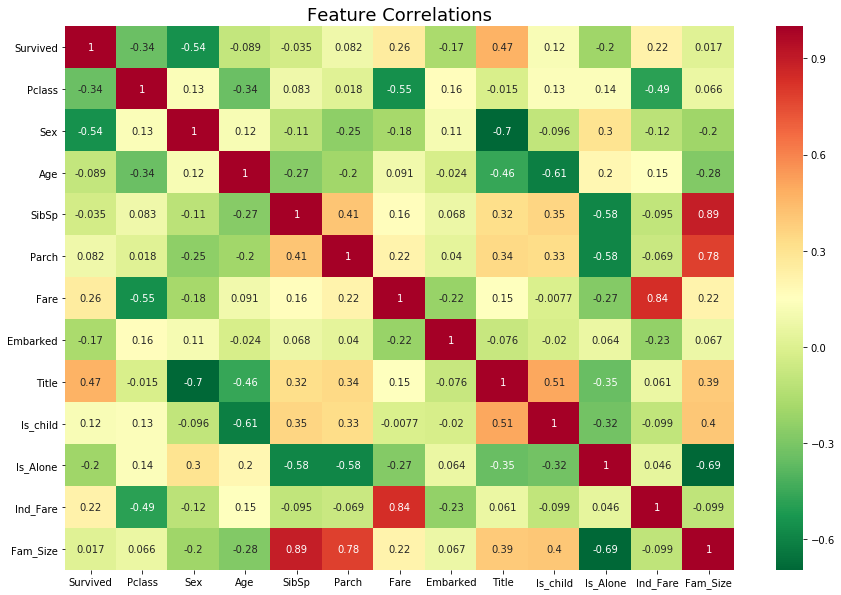

In [37]:
plt.subplots(figsize = (15,10))
sns.heatmap(train_data.drop(columns='PassengerId').corr(), annot=True,cmap="RdYlGn_r")
plt.title("Feature Correlations", fontsize = 18)

Random Forest Classifier¶
I decided to use a random forest classifier Algorithm as my first algorithm

In [38]:
from sklearn.ensemble import RandomForestClassifier

#Select features
y = train_data["Survived"]

features = ["Pclass", "Sex",'Fare','Title','Is_child','Is_Alone']
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=7)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [39]:
output.groupby('Survived').count()

,PassengerId
Survived,
0,268
1,150


In [40]:
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [41]:
test_data.head(15)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Is_child,Is_Alone,Ind_Fare,Fam_Size
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,2,1,0.0,1,7.829200,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,3,2,0.0,0,3.500000,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,2,1,0.0,1,9.687500,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,3,1,0.0,1,8.662500,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,3,2,0.0,0,4.095833,2
5,897,3,"Svensson, Mr. Johan Cervin",1,14.0,0,0,7538,9.2250,NaN,3,1,1.0,1,9.225000,0
6,898,3,"Connolly, Miss. Kate",0,30.0,0,0,330972,7.6292,NaN,2,3,0.0,1,7.629200,0
7,899,2,"Caldwell, Mr. Albert Francis",1,26.0,1,1,248738,29.0000,NaN,3,1,0.0,0,9.666667,2
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.0,0,0,2657,7.2292,NaN,1,2,0.0,1,7.229200,0
9,901,3,"Davies, Mr. John Samuel",1,21.0,2,0,A/4 48871,24.1500,NaN,3,1,0.0,0,8.050000,2
